In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime
import matplotlib.pyplot as plt
from scikeras.wrappers import KerasRegressor
import boto3
from io import StringIO

In [4]:
session = boto3.Session(profile_name='ai-dataset-bucket-readwrite-795524854110')

# Connect to S3
s3 = session.client('s3')

bucket_name = 'artificial-intelligence-datasets'
object_key = 'prepared/NIFTY50 Dataset/NIFTY50_prepared.csv'  # e.g., 'project1/data/sample.csv'

# Download object into memory
response = s3.get_object(Bucket=bucket_name, Key=object_key)

with response['Body'] as stream:
    body = stream.read().decode('utf-8')

df = pd.read_csv(StringIO(body))

df.head()

,Date,Symbol,Close,Symbol_en,Prev_Close_scaled,Open_scaled,High_scaled,Low_scaled,Last_scaled,VWAP_scaled,Volume_scaled,Turnover_scaled,Trades_scaled,DeliverableVolume_scaled,Symbol_en_scaled,Year,Month,Day,Day_of_Week,Day_of_Year
0,2007-11-27,MUNDRAPORT,962.90,483791.136313,-0.130695,0.209617,0.481037,0.224253,0.404750,0.431607,9.384118,15.385090,-0.039056,7.229856,7.441885,2007,11,27,1,331
1,2007-11-28,MUNDRAPORT,893.90,478060.423240,0.409546,0.430620,0.420031,0.333491,0.328343,0.386832,1.274760,2.131802,-0.039056,0.712739,7.255762,2007,11,28,2,332
2,2007-11-29,MUNDRAPORT,884.20,477708.343281,0.338258,0.353166,0.343518,0.298829,0.330408,0.331779,1.468552,2.271529,-0.039056,0.415349,7.244327,2007,11,29,3,333
3,2007-11-30,MUNDRAPORT,921.55,478060.423240,0.328236,0.333544,0.387494,0.350297,0.373774,0.374218,1.284908,2.114470,-0.039056,0.563606,7.255762,2007,11,30,4,334
4,2007-12-03,MUNDRAPORT,969.30,484680.351304,0.366825,0.384922,0.425114,0.383908,0.426433,0.411905,0.702122,1.287443,-0.039056,0.218777,7.470765,2007,12,3,0,337


In [5]:
df.drop(axis=1, columns=["Date", "Symbol"], inplace=True)
df.head()

,Close,Symbol_en,Prev_Close_scaled,Open_scaled,High_scaled,Low_scaled,Last_scaled,VWAP_scaled,Volume_scaled,Turnover_scaled,Trades_scaled,DeliverableVolume_scaled,Symbol_en_scaled,Year,Month,Day,Day_of_Week,Day_of_Year
0,962.90,483791.136313,-0.130695,0.209617,0.481037,0.224253,0.404750,0.431607,9.384118,15.385090,-0.039056,7.229856,7.441885,2007,11,27,1,331
1,893.90,478060.423240,0.409546,0.430620,0.420031,0.333491,0.328343,0.386832,1.274760,2.131802,-0.039056,0.712739,7.255762,2007,11,28,2,332
2,884.20,477708.343281,0.338258,0.353166,0.343518,0.298829,0.330408,0.331779,1.468552,2.271529,-0.039056,0.415349,7.244327,2007,11,29,3,333
3,921.55,478060.423240,0.328236,0.333544,0.387494,0.350297,0.373774,0.374218,1.284908,2.114470,-0.039056,0.563606,7.255762,2007,11,30,4,334
4,969.30,484680.351304,0.366825,0.384922,0.425114,0.383908,0.426433,0.411905,0.702122,1.287443,-0.039056,0.218777,7.470765,2007,12,3,0,337


In [6]:
X = df.loc[:, df.columns != "Close"]
y = df["Close"]
X_train, X_left, y_train, y_left = train_test_split(X, y, test_size=0.4, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_left, y_left, test_size=0.5, random_state=42)
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape, X_test.shape, y_test.shape

((141115, 17), (141115,), (47038, 17), (47038,), (47039, 17), (47039,))

In [7]:
model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(32, activation="relu"),
        Dense(1),
    ]
)

c:\Users\gunit\OneDrive\Documents\Study Material\Practice Projects\artificial-intelligence\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mean_absolute_error",
    metrics=["mean_absolute_error"],
)

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
log_dir = "../logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [11]:
early_stopping_callback = EarlyStopping(
    monitor="val_loss", 
    patience=10, 
    restore_best_weights=True
)

In [12]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_cv, y_cv),
    callbacks=[tensorboard_callback, early_stopping_callback],
)

Epoch 1/100
4410/4410 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1072.3373 - mean_absolute_error: 1072.3373 - val_loss: 973.6035 - val_mean_absolute_error: 973.6035
Epoch 2/100
4410/4410 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 942.1302 - mean_absolute_error: 942.1302 - val_loss: 793.3087 - val_mean_absolute_error: 793.3087
Epoch 3/100
4410/4410 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 767.7693 - mean_absolute_error: 767.7693 - val_loss: 472.1958 - val_mean_absolute_error: 472.1958
Epoch 4/100
4410/4410 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 521.5054 - mean_absolute_error: 521.5054 - val_loss: 581.9427 - val_mean_absolute_error: 581.9427
Epoch 5/100
4410/4410 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 479.0916 - mean_absolute_error: 479.0916 - val_loss: 174.1723 - val_mean_absolute_error: 174.1723
Epoch 6/100
4410/4410 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 390.2806 - mean_absolute_error: 390.2806 - val_loss: 246.7626 - val_mean_absolute_error: 246.7626
Epoch 7/100
4410/4410 ━━━━━

In [13]:
%load_ext tensorboard

In [25]:
%tensorboard --logdir ../../log/NIFTY50 Stock Price Prediction/fit --bind_all

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2025-05-10 02:05:00.104237: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-10 02:05:01.090951: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]

In [15]:
model.evaluate(X_test, y_test)

1470/1470 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 23.3973 - mean_absolute_error: 23.3973


[23.4324951171875, 23.4324951171875]

In [16]:
y_pred = model.predict(X_test)

1470/1470 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step


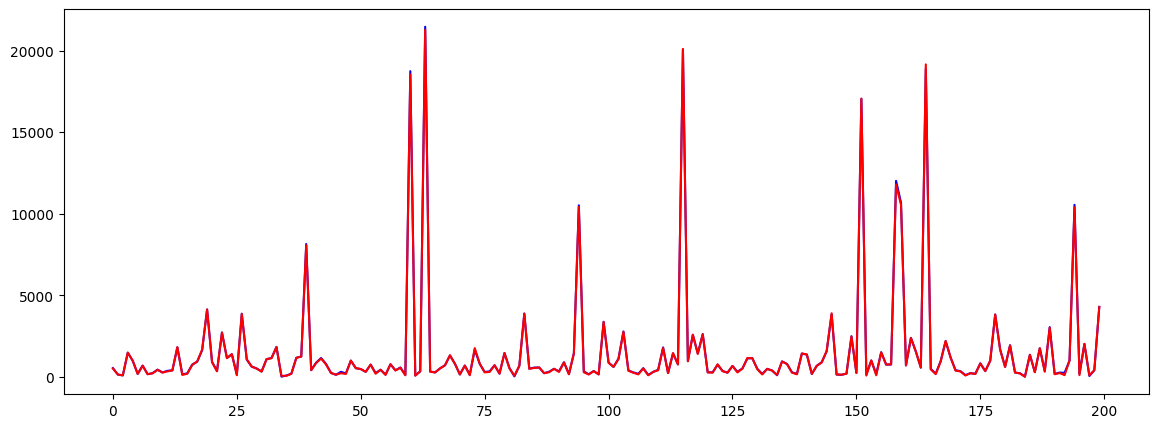

In [17]:
plt.figure(figsize=(14, 5))
plt.plot(y_test.values[:200], label="True Values", color="blue")
plt.plot(y_pred[:200], label="Predicted Values", color="red")
plt.show()

### Hyperparameter Tuning to try different architectures of the nueral network

In [27]:
def create_model(hidden_layer_neurons=(32,), activation_fn="relu"):
    model = Sequential()
    model.add(Dense(hidden_layer_neurons[0], activation=activation_fn, input_shape=(X_train.shape[1],)))
    for i in range(1, len(hidden_layer_neurons)):
        model.add(Dense(hidden_layer_neurons[i], activation=activation_fn))
    model.add(Dense(1))  # Output layer for regression
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="mean_absolute_error",
        metrics=["mean_absolute_error"],
    )
    return model

In [28]:
# Test create_model
test_model = create_model(hidden_layer_neurons=(64, 32), activation_fn="relu")
test_model.summary()

# Test KerasRegressor
model = KerasRegressor(
    build_fn=create_model,
    hidden_layer_neurons=(64, 32),
    activation_fn="relu",
    epochs=10,
    batch_size=32,
    verbose=1
)
model.fit(X_train, y_train)

c:\Users\gunit\OneDrive\Documents\Study Material\Practice Projects\artificial-intelligence\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


c:\Users\gunit\OneDrive\Documents\Study Material\Practice Projects\artificial-intelligence\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\gunit\OneDrive\Documents\Study Material\Practice Projects\artificial-intelligence\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4410/4410 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 1439.2980 - mean_absolute_error: 1439.2980
Epoch 2/10
4410/4410 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 951.7693 - mean_absolute_error: 951.7693
Epoch 3/10
4410/4410 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 677.1241 - mean_absolute_error: 677.1241
Epoch 4/10
4410/4410 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 380.9590 - mean_absolute_error: 380.9590
Epoch 5/10
4410/4410 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 313.9541 - mean_absolute_error: 313.9541
Epoch 6/10
4410/4410 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 275.9811 - mean_absolute_error: 275.9811
Epoch 7/10
4410/4410 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 229.6126 - mean_absolute_error: 229.6126
Epoch 8/10
4410/4410 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 240.7053 - mean_absolute_error: 240.7053
Epoch 9/10
4410/4410 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 243.9193 - mean_absolute_error: 243.9193
Epoch 10/10
4410/4410 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 223.2398 - mean_abs

KerasRegressor(
	model=None
	build_fn=<function create_model at 0x0000017AD40E91C0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	hidden_layer_neurons=(64, 32)
	activation_fn=relu
)

In [30]:
model = KerasRegressor(hidden_layer_neurons=(32,), 
                       activation_fn="relu", 
                       build_fn=create_model, 
                       epochs=100, 
                       batch_size=32, 
                       verbose=1
                    )

#model = KerasRegressor(
#    build_fn=create_model,
#    verbose=1
#)

In [31]:
param_grid = {
    'hidden_layer_neurons': [(64,), (32,), (32, 32), (64, 64), (128, 64, 32)],
    'activation_fn': ['relu', 'tanh'],
}

In [ ]:

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    n_jobs=1,
    cv=3,
    verbose=1
)

grid_result = grid.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100


c:\Users\gunit\OneDrive\Documents\Study Material\Practice Projects\artificial-intelligence\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\gunit\OneDrive\Documents\Study Material\Practice Projects\artificial-intelligence\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2940/2940 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 2699.1890 - mean_absolute_error: 2699.1890
Epoch 2/100
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 946.7489 - mean_absolute_error: 946.7489
Epoch 3/100
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 879.5435 - mean_absolute_error: 879.5435
Epoch 4/100
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 809.2479 - mean_absolute_error: 809.2479
Epoch 5/100
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 708.4377 - mean_absolute_error: 708.4377
Epoch 6/100
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 595.5098 - mean_absolute_error: 595.5098
Epoch 7/100
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 473.6827 - mean_absolute_error: 473.6827
Epoch 8/100
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 339.6176 - mean_absolute_error: 339.6176
Epoch 9/100
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 271.1186 - mean_absolute_error: 271.1186
Epoch 10/100
2940/2940 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 226.4536 -

In [ ]:
print(f"Best grid parameters = {grid_result.best_params_}")
print(f"Best grid score = {grid_result.best_score_}")
print(f"Best grid estimator = {grid_result.best_estimator_}")
print(f"Best grid index = {grid_result.best_index_}")

NameError: name 'grid_result' is not defined

In [ ]:
best_model = grid_result.best_estimator_

In [ ]:
test_score = best_model.score(X_cv, y_cv)
print(f"Test Score: {test_score}")

1470/1470 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step
Test Score: 0.9996274322198694


In [ ]:
test_score = best_model.score(X_test, y_test)
print(f"Test Score: {test_score}")

1470/1470 ━━━━━━━━━━━━━━━━━━━━ 1s 562us/step
Test Score: 0.9995661197223796


1470/1470 ━━━━━━━━━━━━━━━━━━━━ 1s 572us/step


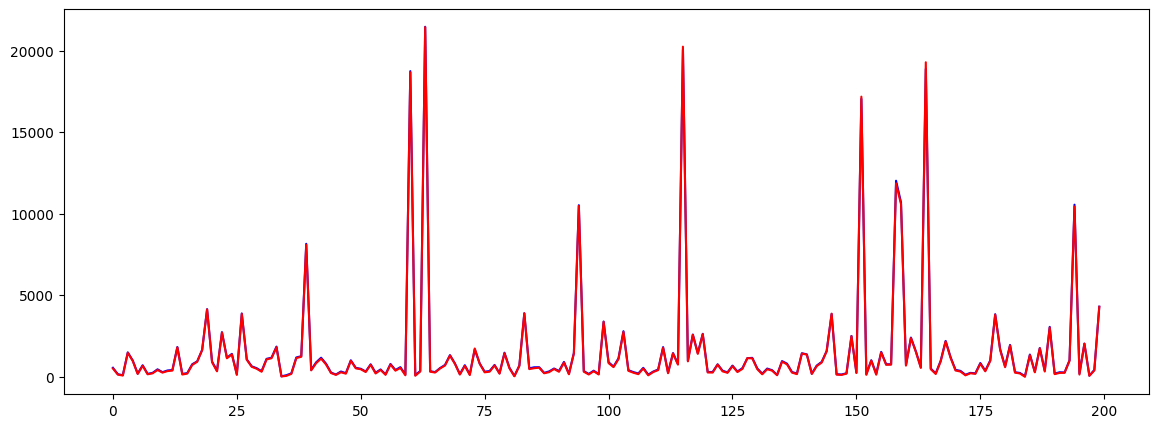

In [ ]:
y_pred = best_model.predict(X_test)
plt.figure(figsize=(14, 5))
plt.plot(y_test.values[:200], label="True Values", color="blue")
plt.plot(y_pred[:200], label="Predicted Values", color="red")
plt.show()